# Machine Learning: A Quantitative Approach

The general notion here is that Elastic Net adds both an l1 and l2 term to the cost function, which in effect behaves like both a Ridge regularization and a LASSO regularization.


+ _p_ = 0 == *Ridge*

+ _p_ = 1 == *LASSO*

In [1]:
%matplotlib inline

In [2]:
import sys, csv
import time

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import Counter
import seaborn as sns

In [3]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Dataset

In [6]:
vehicles_df = pd.read_csv("datasets/vehicles.csv", low_memory = False)

In [7]:
vehicles_displ_mpg_all = vehicles_df[['displ', 'UHighway']]

In [8]:
vehicles_displ_mpg = vehicles_displ_mpg_all[vehicles_displ_mpg_all.displ > 0]

### Split / Train Test

In [9]:
half = int(len(vehicles_displ_mpg) / 2)

In [10]:
first_half = vehicles_displ_mpg[:half]
second_half = vehicles_displ_mpg[half:]

In [11]:
first_half_sorted = first_half.sort_values(by=['displ', 'UHighway'])
first_half_grouped_by_median = pd.DataFrame(
    {'train_median' : first_half_sorted.groupby('displ')['UHighway'].median()}).reset_index()

In [12]:
first_half_x = first_half_grouped_by_median['displ'].values.reshape(-1,1)

In [13]:
print(type(first_half_x))

<class 'numpy.ndarray'>


In [14]:
first_half_y = first_half_grouped_by_median['train_median'].values.reshape(-1,1)

In [15]:
second_half_sorted = second_half.sort_values(by=['displ', 'UHighway'])
second_half_grouped_by_median = pd.DataFrame(
    {'test_median' : second_half_sorted.groupby('displ')['UHighway'].median()}).reset_index()

In [16]:
second_half_x = second_half_grouped_by_median['displ'].values.reshape(-1, 1)
second_half_y = second_half_grouped_by_median['test_median'].values.reshape(-1,1)

In [17]:
def elastic_reg(alpha = 0.1, l1_ratio = 0.7):
    colors = ['green', 'blue', 'red', 'purple']
    lw = 1

    for count, degree in enumerate([1, 2, 4, 8]):
        model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
        model.fit(first_half_x, first_half_y)
        second_half_y_pred = model.predict(second_half_x)

        plt.plot(second_half_x, second_half_y_pred, color=colors[count], linewidth=lw,
                label="degree %d" % degree)
        print("degree %d" % degree)
        mse = mean_squared_error(second_half_y, second_half_y_pred)
        rmse = np.sqrt(mse)
        print("\tModel parameters: ", model.get_params(deep=False))
        print("\tMean squared error: %.2f" % mse,"\tRoot mean squared error: %.2f" % rmse, \
            '\tR-squared score: %.2f' % r2_score(second_half_y, second_half_y_pred))

    # Plot outputs
    plt.scatter(second_half_x, second_half_y,  color='gold')
    #plt.plot(second_half_x, second_half_y_pred, color='blue', linewidth=3)
    plt.title ("alpha= %f" % alpha, fontsize=15)
    plt.xlabel ("Engine displacement (liter)", fontsize = 15)
    plt.ylabel ("Fuel economy (MPG)", fontsize = 15)
    plt.legend(loc='upper right', fontsize = 15)
    plt.show()

degree 1
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]}
	Mean squared error: 31.23 	Root mean squared error: 5.59 	R-squared score: 0.65
degree 2
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]}
	Mean squared error: 22.50 	Root mean squared error: 4.74 	R-squared score: 0.75
degree 4
	Model parameters:  {'memory': None, 'steps': [('polyno

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


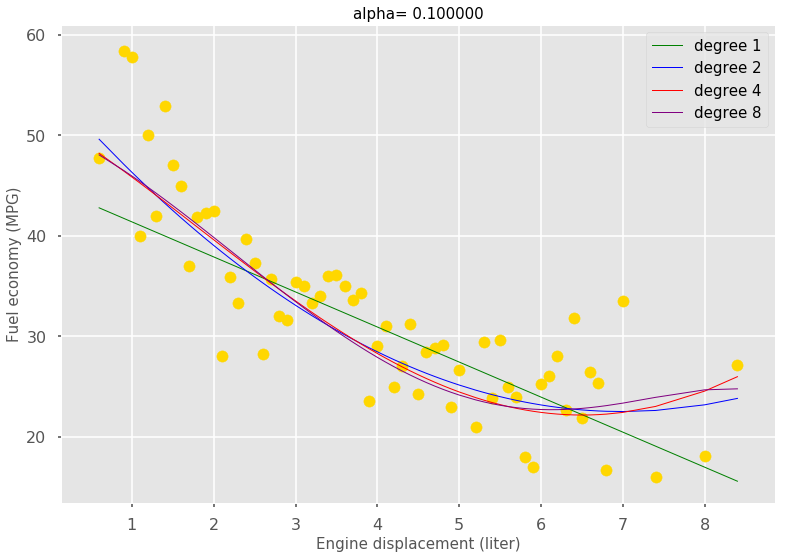

In [20]:
elastic_reg(0.1)

degree 1
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]}
	Mean squared error: 33.15 	Root mean squared error: 5.76 	R-squared score: 0.63
degree 2
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]}
	Mean squared error: 33.15 	Root mean squared error: 5.76 	R-squared score: 0.63
degree 4
	Model parameters:  {'memory': None, 'steps': [('polynomial

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


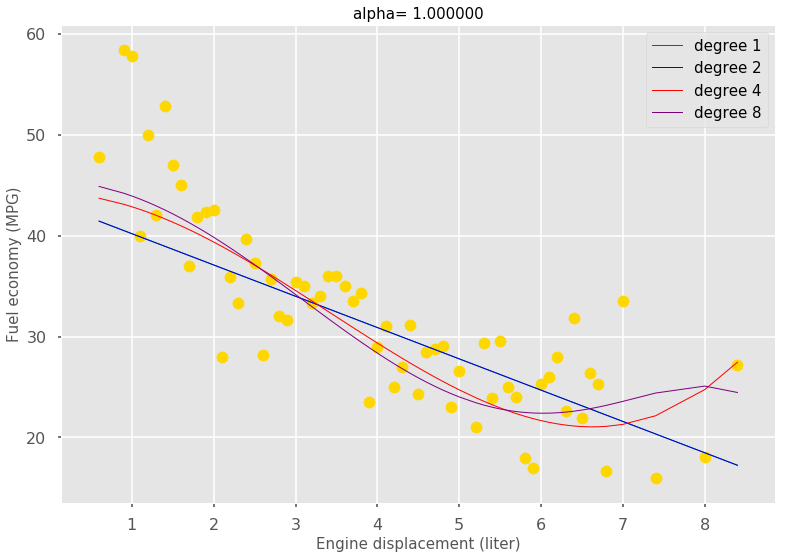

In [21]:
elastic_reg(1)